LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

INPUT DATA

In [ ]:
data = pd.read_csv('Ice Cream.csv')
x = data['Temperature'].values
y = data['Revenue'].values

SPLIT THE DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

SORT THE TRAINING DATA

In [ ]:
sorted_indices = np.argsort(x_train)
x_train_sorted = x_train[sorted_indices]
y_train_sorted = y_train[sorted_indices]

PREDICT FUNCTION

In [ ]:
def predict(new_x, x, y_interpolated):
    return np.interp(new_x, x, y_interpolated)

PREDICT VALUES

In [ ]:
y_test_pred = predict(x_test, x_train_sorted, y_train_sorted)

CALCULATE ERRORS FOR TESTING SET

In [ ]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

INITIALIZATION

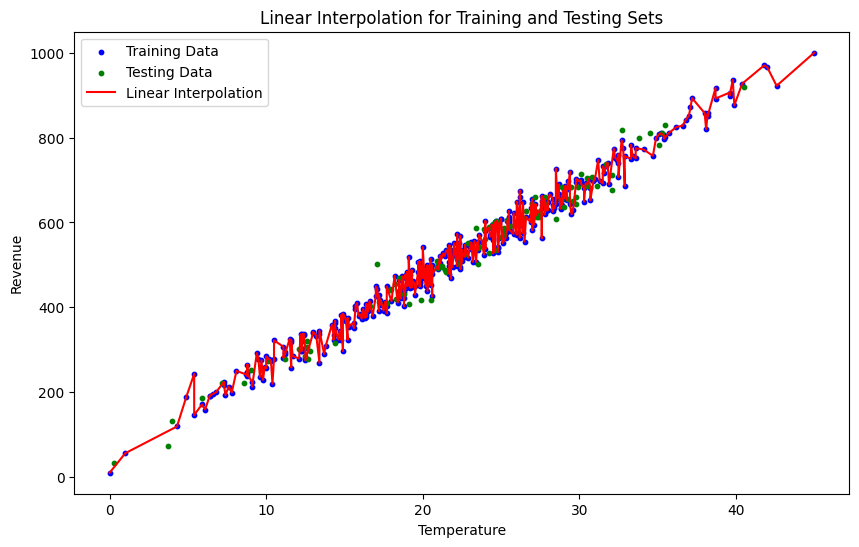

Testing Set:
Mean Absolute Error (MAE): 25.983
Mean Squared Error (MSE): 1192.378
Root Mean Squared Error (RMSE): 34.531


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='blue', s=10)
plt.scatter(x_test, y_test, label='Testing Data', color='green', s=10)
plt.plot(x_train_sorted, y_train_sorted, color='red', label='Linear Interpolation')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Linear Interpolation for Training and Testing Sets')
plt.legend()
plt.show()

print('Testing Set:')
print(f'Mean Absolute Error (MAE): {mae_test:.3f}')
print(f'Mean Squared Error (MSE): {mse_test:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.3f}')


PREDICTING UNKNOWN VALUES

In [ ]:
while True:
    user_input = input("Enter a new temperature value (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    try:
        new_x = float(user_input)
        new_y = predict(new_x, x_train_sorted, y_train_sorted)
        print(f'Predicted revenue for temperature = {new_x} is {new_y:.3f}')
    except ValueError:
        print("Invalid input. Please enter a numerical value.")\

Enter a new temperature value (or type 'exit' to quit): 23.3
Predicted revenue for temperature = 23.3 is 556.000
Enter a new temperature value (or type 'exit' to quit): 46
Predicted revenue for temperature = 46.0 is 1000.000
Enter a new temperature value (or type 'exit' to quit): -5
Predicted revenue for temperature = -5.0 is 10.000
Enter a new temperature value (or type 'exit' to quit): exit
